In [1]:
# 每行描述一个广告位，各字段之间由逗号分隔，顺序依次为：“positionID，sitesetID，positionType”。
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
path = '~/codedata/tpai/pre/'
train = pd.read_csv(path + 'train.csv')
position = pd.read_csv(path + 'position.csv')
trainfile = 'test.csv'
test = pd.read_csv(path + trainfile)
test.drop('instanceID', axis=1, inplace=True)
train = pd.concat([train, test])
train = pd.merge(train, position, on = 'positionID', how='left')

In [2]:
train.shape
train.head()

,clickTime,connectionType,conversionTime,creativeID,label,positionID,telecomsOperator,userID,sitesetID,positionType
0,170000,1,NaN,3089,0,293,1,2798058,0,3
1,170000,1,NaN,1259,0,6161,2,463234,0,1
2,170000,4,NaN,4465,0,7434,1,1857485,0,1
3,170000,1,NaN,1004,0,977,1,2038823,0,1
4,170000,1,NaN,1887,0,3688,1,2015141,0,1


In [3]:
test = {}
def property(var, train):
    # 点击量的统计直方图     
    sns.distplot(train[var], kde=False)
    # means = train.groupby(var)['date'].mean()
    group = train.groupby('date')[var]
    means = group.mean()
    std = group.std()
    # 根据var属性的每一个取值做均值     
    fig = plt.figure()
    plt.scatter(x=means.index, y = means.values)
    fig = plt.figure()
    plt.scatter(x=std.index, y = std.values)
    # 按顺序画散点图
    sort_means = means.sort_values(ascending = False)
    fig = plt.figure()
    plt.scatter(x = range(0,len(sort_means)), y = sort_means.values)
    # 方差存储的是不同天的var属性的方差，std.std()     
    return (var, len(train[var].value_counts()),std.max()-std.min(), std.std(), sort_means.max() - sort_means.min(), sort_means.std())

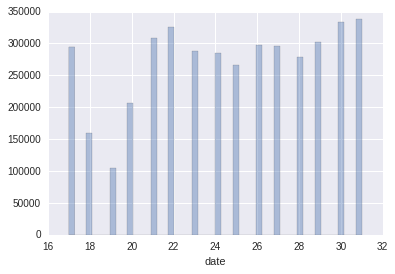

In [4]:
# 测试集只有一天
var = 'date'
train[var] = (train['clickTime'].values) / 10000
# test[var] = property(var, train)
sns.distplot(train[var], kde=False)

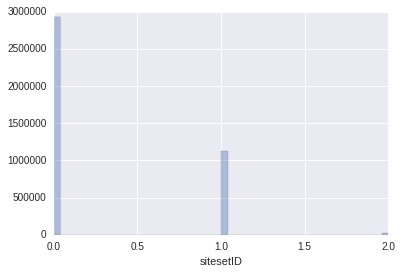

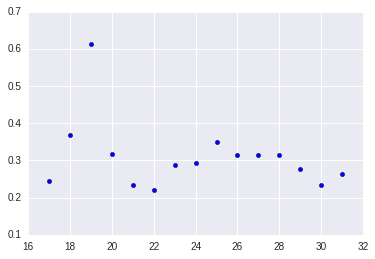

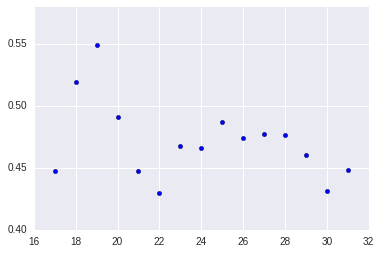

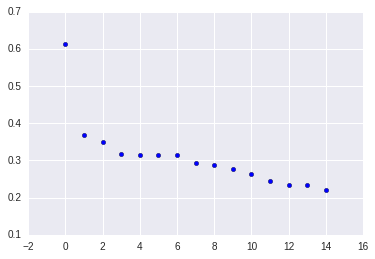

In [5]:
var = 'sitesetID'
test[var] = property(var, train)

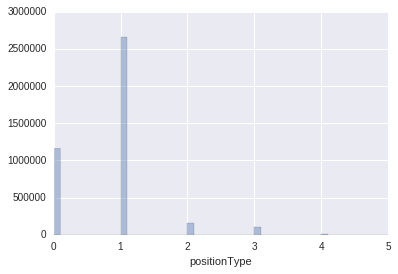

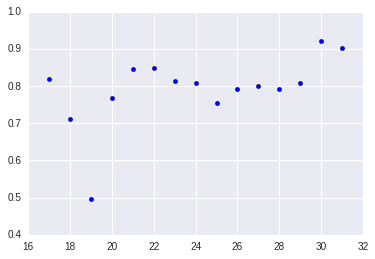

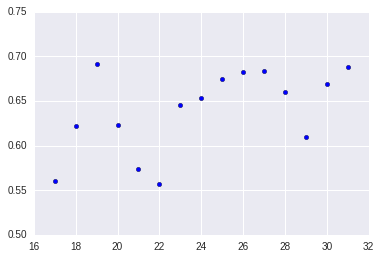

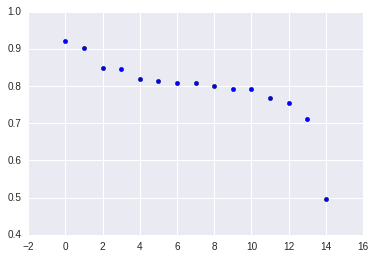

In [6]:
# sns.distplot(position['sitesetID'], kde=False)
# position[position['sitesetID'] == 2]
var = 'positionType'
test[var] = property(var, train)

In [7]:
for (k,v) in test.items():
    print v

('sitesetID', 3, 0.1193693578087453, 0.031956604047359123, 0.3929128482571797, 0.094598079680047215)
('positionType', 6, 0.13431730541083087, 0.046691396799158312, 0.42531957580332302, 0.097322621719887911)
